In [21]:
import kagglehub
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Download latest version
path = kagglehub.dataset_download("inancigdem/eeg-data-for-mental-attention-state-detection")

print("Path to dataset files:", path)

# Collect all file names
file_names = []
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))

Path to dataset files: C:\Users\Admin\.cache\kagglehub\datasets\inancigdem\eeg-data-for-mental-attention-state-detection\versions\1


File 1 - data shape: (308868, 25)


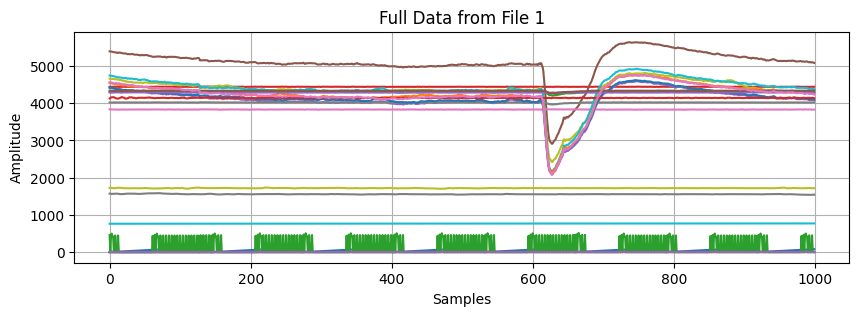

File 1 - data_eeg shape: (308868, 14)


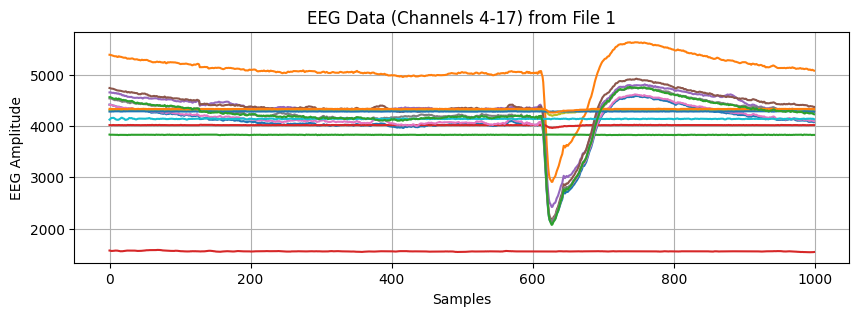

File 2 - data shape: (381340, 25)


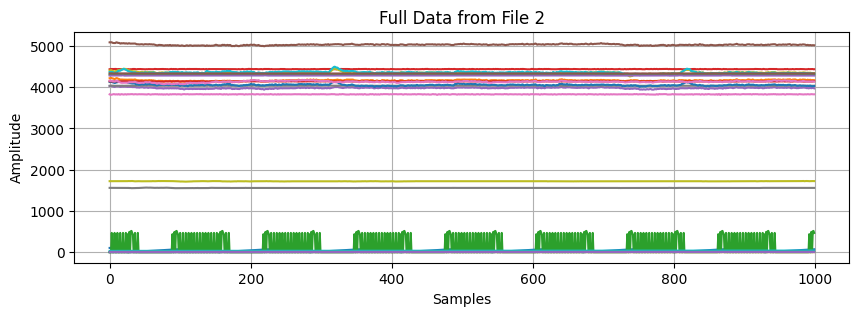

File 2 - data_eeg shape: (381340, 14)


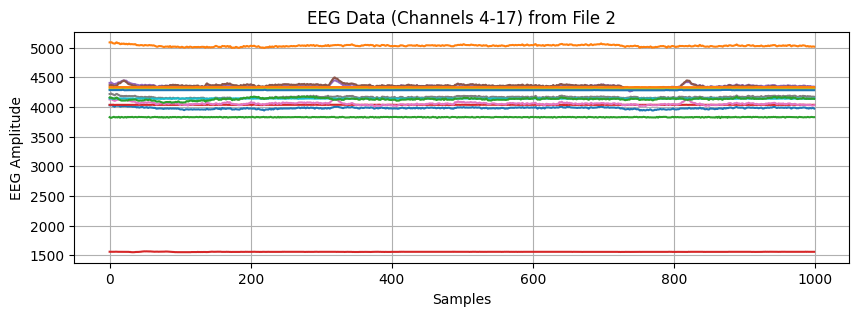

File 3 - data shape: (391624, 25)


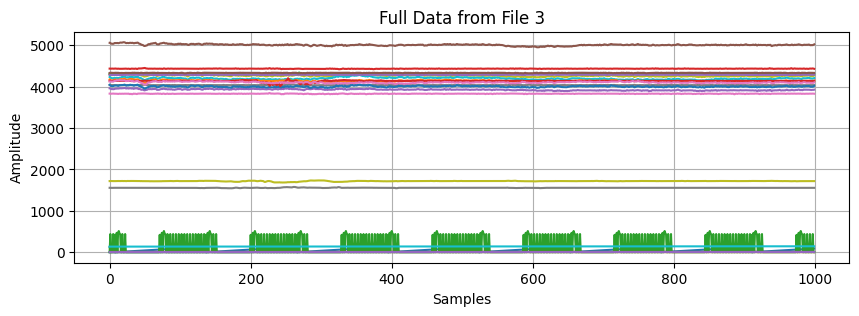

File 3 - data_eeg shape: (391624, 14)


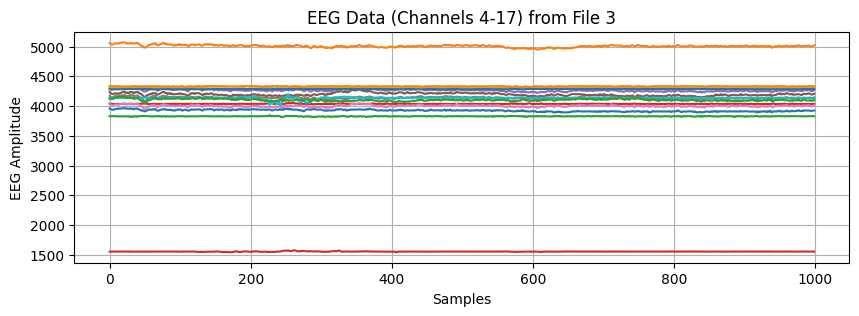

In [22]:
# Load and analyze data from all files
all_data = []
for i in range(3):
    try:
        record = loadmat(file_names[i])
        if 'o' not in record:
            print(f"File {i+1} does not contain key 'o'. Skipping.")
            continue
        
        mdata = record['o']  # main object
        sample1 = {n: mdata[n][0,0] for n in mdata.dtype.names}

        data = sample1['data']
        trials = sample1['trials']

        print(f'File {i+1} - data shape:', data.shape)

        # Plot full data (limiting to the first 1000 samples for visualization purposes)
        plt.figure(figsize=(10, 3))
        plt.plot(data[:1000])  # Limiting to first 1000 samples
        plt.title(f'Full Data from File {i+1}')
        plt.xlabel('Samples')
        plt.ylabel('Amplitude')
        plt.grid(True)
        plt.show()

        # Extract EEG data (Channels 4-17)
        data_eeg = data[:, 4:18]
        print(f'File {i+1} - data_eeg shape:', data_eeg.shape)

        # Plot extracted EEG data (limiting to the first 1000 samples)
        plt.figure(figsize=(10, 3))
        plt.plot(data_eeg[:1000])
        plt.title(f'EEG Data (Channels 4-17) from File {i+1}')
        plt.xlabel('Samples')
        plt.ylabel('EEG Amplitude')
        plt.grid(True)
        plt.show()

        all_data.append(data_eeg)
    except Exception as e:
        print(f"Error processing file {i+1}: {e}")


In [ ]:
# Kết hợp dữ liệu từ tất cả các file thành một array duy nhất
if all_data:
    combined_data = np.concatenate(all_data, axis=0)
    print("Combined data size:", combined_data.shape)

    # Chuyển đổi sang Pandas DataFrame
    columns = [f'Channel_{i}' for i in range(4, 18)]
    df = pd.DataFrame(combined_data, columns=columns)
else:
    print("There is no data to combine.")

Kích thước dữ liệu kết hợp: (1081832, 14)


In [24]:
df.head()

,Channel_4,Channel_5,Channel_6,Channel_7,Channel_8,Channel_9,Channel_10,Channel_11,Channel_12,Channel_13,Channel_14,Channel_15,Channel_16,Channel_17
0,4417.948718,5390.769231,3833.846154,4019.487179,4656.410256,4742.051282,4415.384615,4538.461538,4308.205128,4125.641026,4283.589744,4335.384615,4563.589744,1573.0
1,4417.948718,5389.230769,3830.256410,4020.000000,4658.974359,4738.974359,4414.871795,4535.897436,4308.205128,4136.410256,4284.615385,4331.794872,4566.666667,1570.0
2,4414.871795,5385.641026,3829.743590,4017.948718,4655.897436,4734.358974,4414.871795,4537.435897,4308.205128,4152.820513,4283.076923,4333.846154,4557.948718,1567.0
3,4410.256410,5381.025641,3831.794872,4016.410256,4649.230769,4730.256410,4409.743590,4535.384615,4308.717949,4157.948718,4283.076923,4334.358974,4552.820513,1564.0
4,4407.179487,5378.461538,3831.282051,4019.487179,4647.692308,4729.230769,4408.205128,4526.666667,4307.179487,4157.948718,4285.641026,4334.358974,4546.666667,1565.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1081832 entries, 0 to 1081831
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Channel_4   1081832 non-null  float64
 1   Channel_5   1081832 non-null  float64
 2   Channel_6   1081832 non-null  float64
 3   Channel_7   1081832 non-null  float64
 4   Channel_8   1081832 non-null  float64
 5   Channel_9   1081832 non-null  float64
 6   Channel_10  1081832 non-null  float64
 7   Channel_11  1081832 non-null  float64
 8   Channel_12  1081832 non-null  float64
 9   Channel_13  1081832 non-null  float64
 10  Channel_14  1081832 non-null  float64
 11  Channel_15  1081832 non-null  float64
 12  Channel_16  1081832 non-null  float64
 13  Channel_17  1081832 non-null  float64
dtypes: float64(14)
memory usage: 115.6 MB


In [26]:
describe_df = df.describe()
print(describe_df)

          Channel_4     Channel_5     Channel_6     Channel_7     Channel_8  \
count  1.081832e+06  1.081832e+06  1.081832e+06  1.081832e+06  1.081832e+06   
mean   3.978268e+03  5.042741e+03  3.827916e+03  4.032499e+03  4.311727e+03   
std    1.016603e+02  1.066208e+02  5.512631e+00  9.827559e+00  9.801845e+01   
min    3.066667e+02  3.630769e+02  1.458462e+03  1.658974e+03  3.158974e+02   
25%    3.963590e+03  5.026667e+03  3.826667e+03  4.024103e+03  4.294872e+03   
50%    3.978974e+03  5.046667e+03  3.828205e+03  4.035897e+03  4.315897e+03   
75%    3.996923e+03  5.065641e+03  3.829744e+03  4.037436e+03  4.334872e+03   
max    6.693333e+03  7.803077e+03  4.081026e+03  4.344615e+03  6.454359e+03   

          Channel_9    Channel_10    Channel_11    Channel_12    Channel_13  \
count  1.081832e+06  1.081832e+06  1.081832e+06  1.081832e+06  1.081832e+06   
mean   4.282028e+03  4.030613e+03  4.158821e+03  4.308403e+03  4.141775e+03   
std    1.193982e+02  1.124921e+02  9.708428e+01  5.

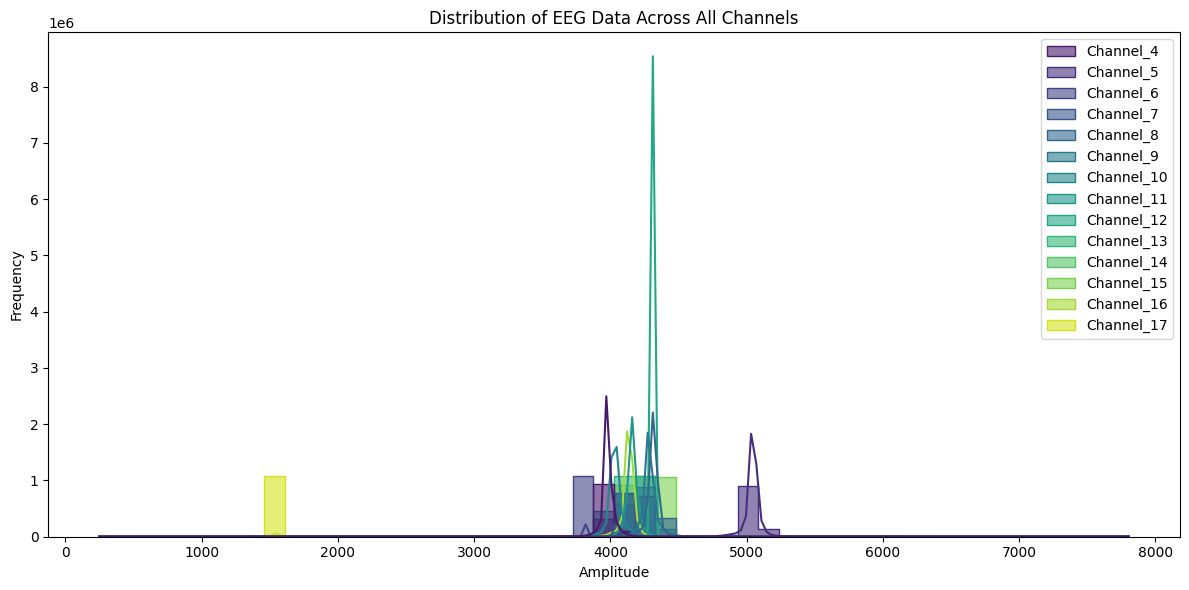

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Khảo sát phân bố dữ liệu bằng biểu đồ
plt.figure(figsize=(12, 6))
sns.histplot(df, kde=True, bins=50, palette='viridis', element='step', alpha=0.6)
plt.title('Distribution of EEG Data Across All Channels')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

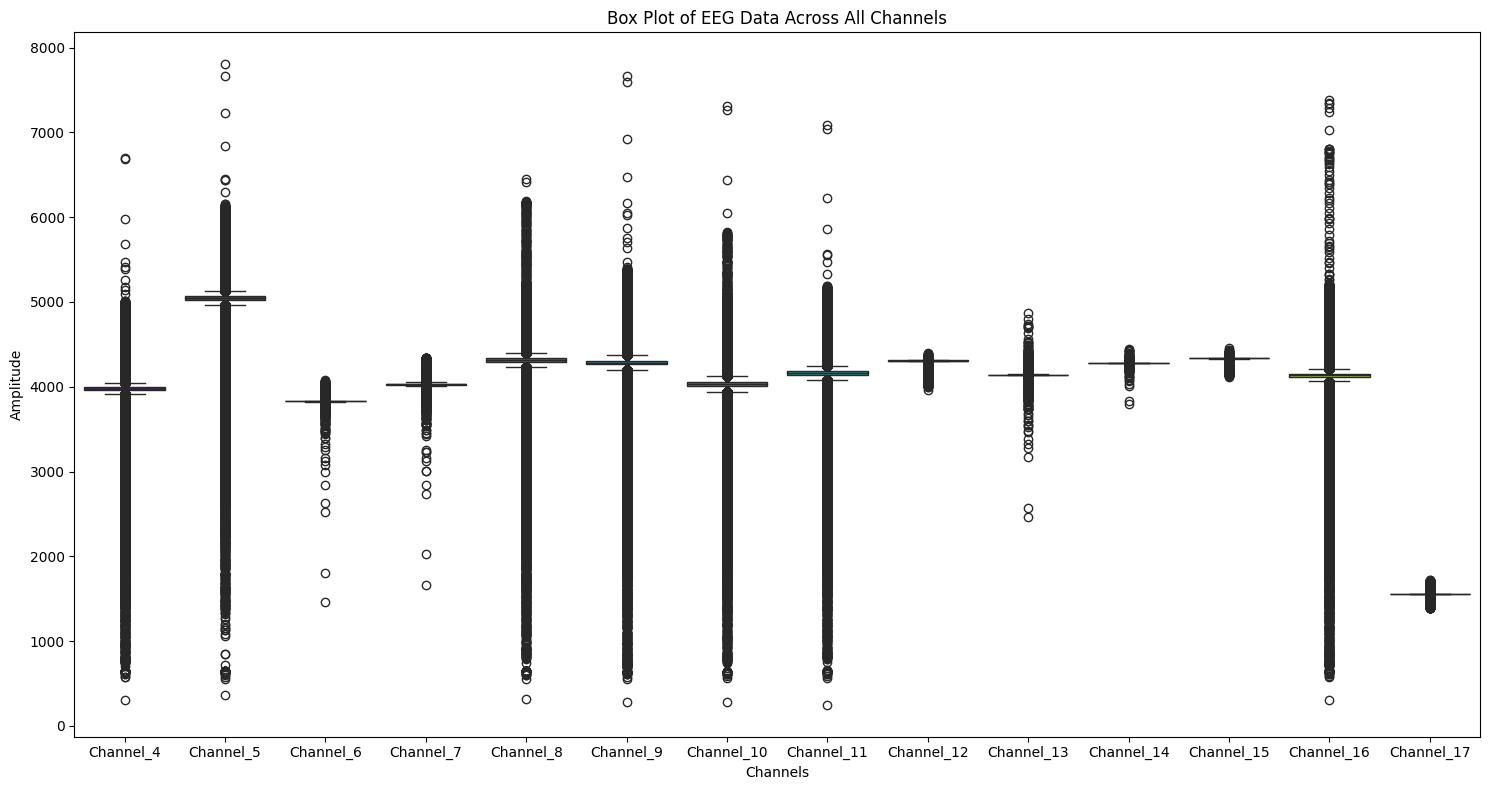

In [29]:
# Vẽ thêm box plot cho dữ liệu EEG
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, palette='viridis')
plt.title('Box Plot of EEG Data Across All Channels')
plt.xlabel('Channels')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()